# Tables, Graphs, and Reports

## Configure

There are many libraries in these fields; however, we will restrict the scope to plotnine, which is a python implementation of R's ggplot2.

We will be using data from the Titanic disaster for demonstration.  Each record is of a passenger and descriptive information. Take a look at the [paper](http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf) for more details on these variables.  

For other quick datasets, see [the data](https://github.com/mwaskom/seaborn-data) that come with the python seaborn module.

In [2]:
import pandas as pd
import numpy as np

In [28]:
import seaborn as sns
import plotnine as p9

Most of these fields are self-explanatory, to be sure, 'pclass' is passenger class, 'name' is title and family names, 'sibsp' is number of siblings/spouses aboard, 'parch' is number of parents/children aboard, 'ticket' is ticket number, 'fare' is passenger fare (British Pound), 'cabin' location, 'embarked' is port of embarkation (Cherbourg, Queenstown, Southampton), and 'boat' is which lifeboat they entered (with many missing values for those who did not get a seat).

In [20]:
table_url = 'https://raw.githubusercontent.com/alexisperrier/packt-aml/master/ch4/extended_titanic.csv'
df = pd.read_csv(table_url)
df.shape

(1309, 19)

In [154]:
df['embarked'] = pd.Categorical(df['embarked'])
df['embarked'] = df['embarked'].cat.rename_categories({'C':'Cherbourg','Q':'Queenstown','S':'Southampton'})

In [155]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,is_age_missing,log_fare,title,deck,family_size
0,3,1,de Mulder Mr. Theodore,male,30.0,0,0,345774,9.500,NaN,Southampton,11,NaN,Belgium Detroit MI,1,3.392317,Mulder,NaN,1
1,3,0,Edvardsson Mr. Gustaf Hjalmar,male,18.0,0,0,349912,7.775,NaN,Southampton,NaN,NaN,Tofta Sweden Joliet IL,1,3.133399,Mr.,NaN,1
2,2,0,Veal Mr. James,male,40.0,0,0,28221,13.000,NaN,Southampton,NaN,NaN,Barre Co Washington VT,1,3.807355,Mr.,NaN,1


## Tables

Cross tabulation in pandas is very accessible.  Below is the simple case with just two categorical variables: survived vs ticket class.

In [7]:
pd.crosstab(df.survived, df.pclass, 
            margins=True
            )

pclass,1,2,3,All
survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


These counts can be `normalized` as a percentage of the totals; hence, the lower-right corner value is 100% when `margins` are included.

We can also scope normalization to just the `rows` / `columns`.

In [18]:
pd.crosstab(df.survived, df.pclass, 
            margins=True,
            normalize=True
            ).round(3)*100

pclass,1,2,3,All
survived,,,,
0,9.0,10.9,41.8,61.6
1,15.3,9.8,13.4,38.4
All,24.2,20.7,55.1,100.0


In [22]:
pd.crosstab(df.survived, df.pclass, 
            margins=True,
            normalize='columns'
            ).round(3)*100

pclass,1,2,3,All
survived,,,,
0,38.1,57.0,74.5,61.8
1,61.9,43.0,25.5,38.2


Instead of using count data, another metric can be used with a descriptive statistic.  Here, the `median` is applied to the price of the ticket across the categories.  It seems the price paid did influence outcome of survival.

In [25]:
pd.crosstab(df.survived, df.pclass, 
            values=df.fare, 
            aggfunc='median'
            ).round(0)

pclass,1,2,3
survived,,,
0,50.0,13.0,8.0
1,77.0,23.0,8.0


You can improve the sophistication by grouping factors.  Here, we group the place of embarkation with the passengers' class.  Interestingly, fare price did not seem to influence survival of those from Queensland.

In [31]:
pd.crosstab(df.survived, [df.embarked, df.pclass], 
            values=df.fare, 
            aggfunc='median',
            colnames=['Emarkation City', "Class"],
            dropna=False
            ).round(0)

Emarkation City     C                 Q                S           
Class               1     2     3     1     2    3     1     2    3
survived                                                           
0                73.0  15.0   7.0  90.0  12.0  8.0  42.0  13.0  8.0
1                79.0  19.0  13.0  90.0  12.0  8.0  57.0  23.0  9.0

When the table gets larger, it becomes increasingly difficult to assess numbers.  Instead, you may want to use seaborn's heatmap which accepts crosstab's resulting DataFrame, directly.

In [39]:
ct = pd.crosstab([df.sex, df.survived], [df.embarked, df.pclass], 
                 values=df.fare, 
                 aggfunc='median',
                 colnames=['Emarkation City', "Class"],
                 dropna=False
                 ).round(0)
ct

Emarkation City     C                 Q                 S            
Class               1     2     3     1     2    3      1     2     3
sex    survived                                                      
female 0         30.0   NaN  14.0   NaN   NaN  8.0  152.0  21.0  16.0
       1         83.0  28.0  15.0  90.0  12.0  8.0   78.0  23.0  11.0
male   0         75.0  15.0   7.0  90.0  12.0  8.0   38.0  13.0   8.0
       1         57.0  14.0  11.0   NaN   NaN  8.0   30.0  19.0   8.0

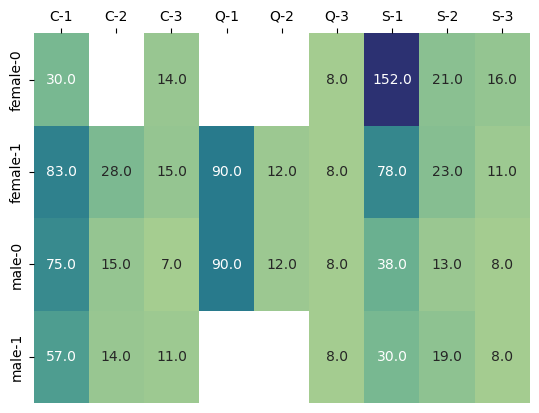

In [44]:
ax = sns.heatmap(ct, 
            cmap="crest", 
            annot=True, 
            cbar=False,
            fmt=".1f"
            )
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

Using the `.styling` method can greatly improve the quality of output.  The following highlights the maximum value of the table and returns the entire table in HTML.  This can be displayed directly in Jupyter.

The highest median fare paid was for women from Southampton with a 1st class ticket, who, strangely, did not survive.

In [61]:
from IPython.display import display, HTML

In [67]:
s = ct.style.highlight_max(axis=None, props='background-color:darkred; font-weight:bold;')
display(HTML( s.to_html() ))

## Graphs

Python has many different graphing modules.  However, none of these meet the popularity of R's ggplot because of the strong theoretical basis for describing visualizations.  If you want a very customized plot, then matplotlib may be the module for you as you dictate everything.  However, for most data visualization work the ggplot module, as implemented in plotnine, far surpasses any custom needs you may have.

### Basic ggplot

Wickham's ggplot module is important because it provides a succinct expression for mapping data to any graphic.  It attempts to implement "The Grammar of Graphics” by Wilkinson, Anand, and Grossman (2005), which is seen as the foundational framework for creating graphics.  It does this by making careful assumptions through defaults in the code; described in [his 2010 paper](http://vita.had.co.nz/papers/layered-grammar.pdf).  The long-term effect is not only a capable and popular library, but also [hundreds of extensions](https://github.com/erikgahner/awesome-ggplot2) that add to the functionality of the code base.

The ggplot module describes four general components to create a __graphical layer of objects__.  Many layers of independent datasets may be combined for a __complete graphic__.  The four components consist of: 

* aesthetics - prepare the dataset for mapping values to 
  - location (ie. x-axis, size) and 
  - geometric shape (ie. circle, line)
* transformations - convert values in scientific units to physical units within our graphical area using identity (ie. grouping, faceting), statistical (ie. binning, aggregating), and scaling (ie. linear, log) functions
* combined rendering - graphical objects from three sources: i) data, ii) scales and coordinate system, iii) plot annotations requires default assumptions and position adjustments

We will explore these components through sequentially sophisticated examples.

In [69]:
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,is_age_missing,log_fare,title,deck,family_size
0,3,1,de Mulder Mr. Theodore,male,30.0,0,0,345774,9.500,NaN,S,11,NaN,Belgium Detroit MI,1,3.392317,Mulder,NaN,1
1,3,0,Edvardsson Mr. Gustaf Hjalmar,male,18.0,0,0,349912,7.775,NaN,S,NaN,NaN,Tofta Sweden Joliet IL,1,3.133399,Mr.,NaN,1
2,2,0,Veal Mr. James,male,40.0,0,0,28221,13.000,NaN,S,NaN,NaN,Barre Co Washington VT,1,3.807355,Mr.,NaN,1


A simple scatterplot is a good way to start.  You begin a plot with the function ggplot(). ggplot() creates a coordinate system for adding layers and contains the dataset, here.  The `geom_point` layer uses the `mapping` argument for relating values to both the x and y axes.  There are many `geom_<shape>` functions that provide for various layers.  This is the basic template for building ggplot graphics.

Below is a one-layer graphic with two variables providing location and a uniform circle for all points.  It uses the previously transformed 'log_fare', instead of the raw fare.  However, we could easily add logarithmic scaling, as shown in the second example.  This second is more informative because the scale is changed without changing the actual values - relieving a great burden from the viewer.

/opt/conda/lib/python3.9/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


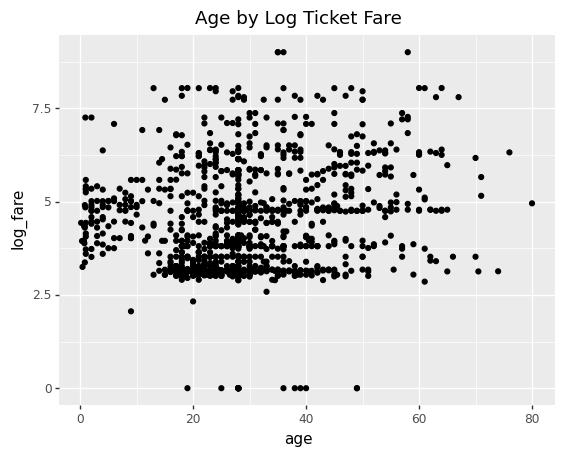

<ggplot: (8786479635258)>

In [142]:
p = p9.ggplot(data=df) +\
        p9.geom_point(mapping=p9.aes(x='age', y='log_fare')) +\
        p9.labs(title='Age by Log Ticket Fare')
p

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


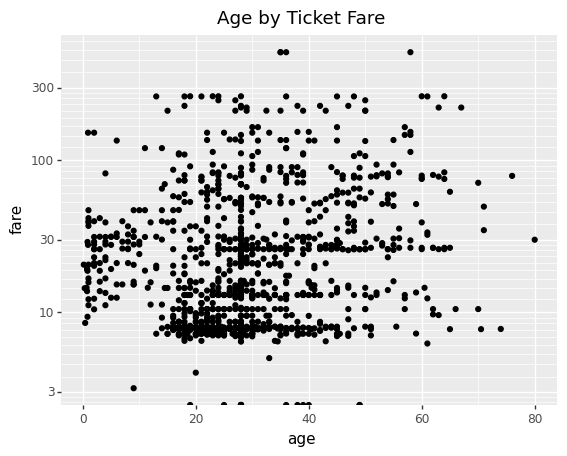

<ggplot: (8786480148393)>

In [141]:
p = p9.ggplot(df) +\
        p9.geom_point(p9.aes(x='age', y='fare')) +\
        p9.scale_y_log10() +\
        p9.labs(title='Age by Ticket Fare')
p

We can add more information to the layer through the `color` argument.  Before we plot, we can create a `Categorical` variable of pclass to ensure that this is not numeric data.  Otherwise, ggplot will think pclass is a continuous variable with a corresponding linear scale to the colors.  These colors are distinct in their contrast with no hint of overlap.

We could also you the `size` argument to present more data, such as 'family size', as shown in the second graphic.  In addition to the `color` and `size` arguments, there are `shape`, `alpha`(transparency), `fill`, as well as others.  Facets, or lattice, such as `facet_wrap` can be used to represent even more data.

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


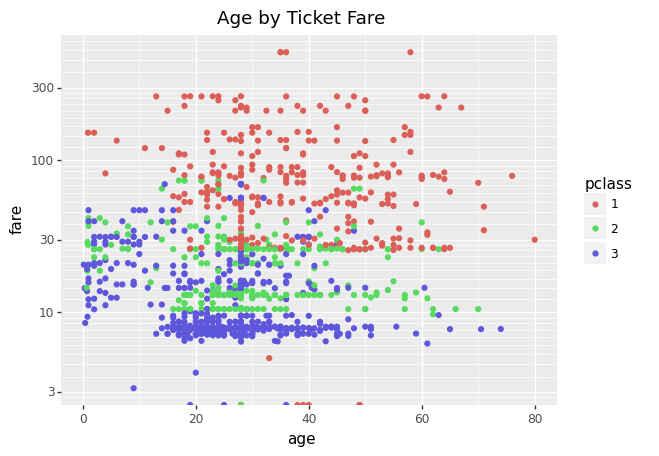

<ggplot: (8786479994832)>

In [144]:
df['pclass'] = pd.Categorical(df['pclass'])
p = p9.ggplot(df) +\
        p9.geom_point(p9.aes(x='age', y='fare', color='pclass')) +\
        p9.scale_y_log10() +\
        p9.labs(title='Age by Ticket Fare')
p

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


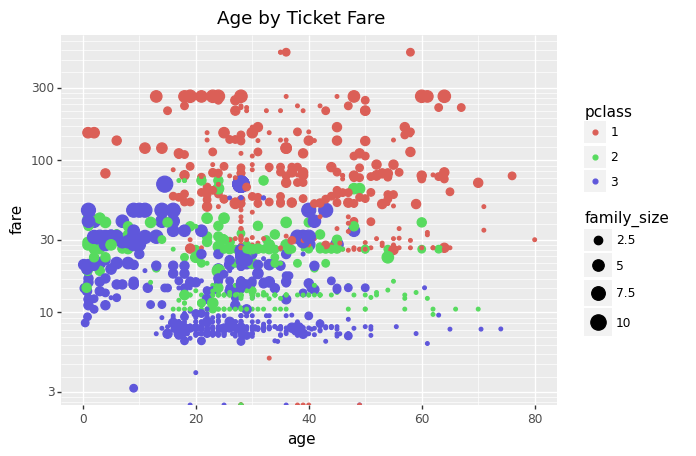

<ggplot: (8786480095582)>

In [146]:
df['pclass'] = pd.Categorical(df['pclass'])
p = p9.ggplot(df) +\
        p9.geom_point(p9.aes(x='age', y='fare', color='pclass', size='family_size')) +\
        p9.scale_y_log10() +\
        p9.labs(title='Age by Ticket Fare')
p

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10


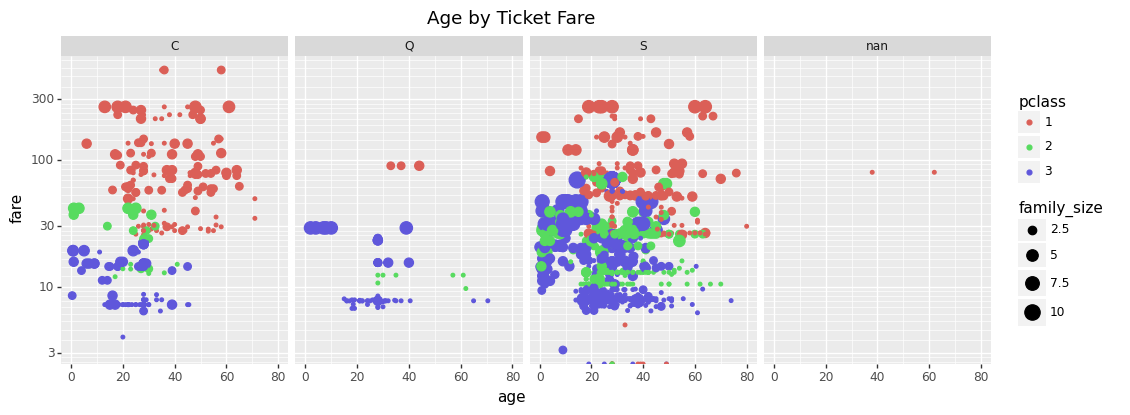

<ggplot: (8786476859338)>

In [152]:
df['pclass'] = pd.Categorical(df['pclass'])
p = p9.ggplot(df) +\
        p9.geom_point(p9.aes(x='age', y='fare', color='pclass', size='family_size')) +\
        p9.scale_y_log10() +\
        p9.facet_wrap('embarked', nrow=1) +\
        p9.labs(title='Age by Ticket Fare') +\
        p9.theme(figure_size=(12,4))
p

We can look at the number of passengers aboard each life boat.  One boat is labeled '13 15 B', which seems to be a different identification from other boats.  No documentation on this seems to exist.

However, we can see that a little less than half of all life boats did not contain the median number of passengers.

In [93]:
cnts = df.boat.value_counts().to_frame()
cnts.rename(columns={'boat': 'count'}, inplace=True)
cnts['boat'] = cnts.index
cnts.head()

,count,boat
13,39,13
C,38,C
15,37,15
14,33,14
4,31,4


In [119]:
med = np.median(cnts['count'] )
boats = cnts[cnts['count'] < med].shape[0]
print(f'Out of {cnts.shape[0]} life boats there are {boats} with less than the {med} passenger median.')

Out of 27 life boats there are 12 with less than the 20.0 passenger median.


Here, we constructed the passenger counts for each life boat, separately from the actual graph.  The `aes()` aesthetic contains the data values (boat ids and count) that are to be used to form the location.  The `geom_bar()` provides the shape which is bar.  It also performs the statistical transformation, 'identity' function, which tells ggplot2 to not aggregate the number of records per boat, instead the y values are provided.  This clearly demonstrates components of a single layer.

However, we can express this more succinctly because ggplot uses careful assumptions within the `geom-*()` methods.  By simply providing the boat id values, `geom_bar()` assumes counts should be applied.  This negates the operations in the first example, but displays the equivalent graphic.

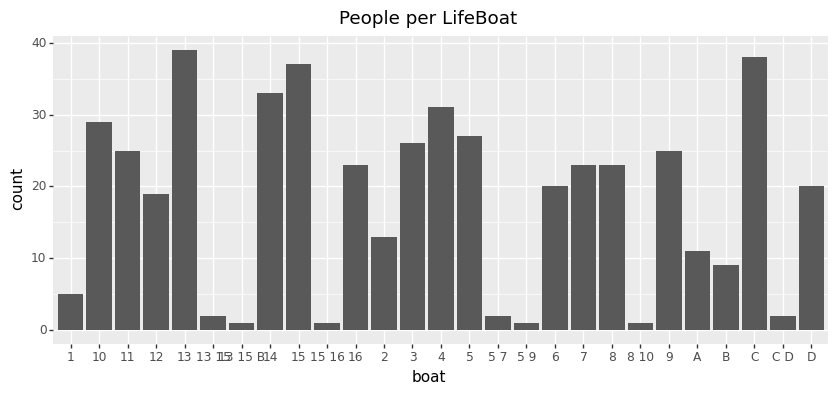

<ggplot: (8786477696928)>

In [123]:
p = p9.ggplot(cnts, p9.aes(x='boat', y='count')) +\
              p9.geom_bar(stat="identity") +\
              p9.labs(title='People per LifeBoat') +\
              p9.theme(figure_size=(10,4))
p

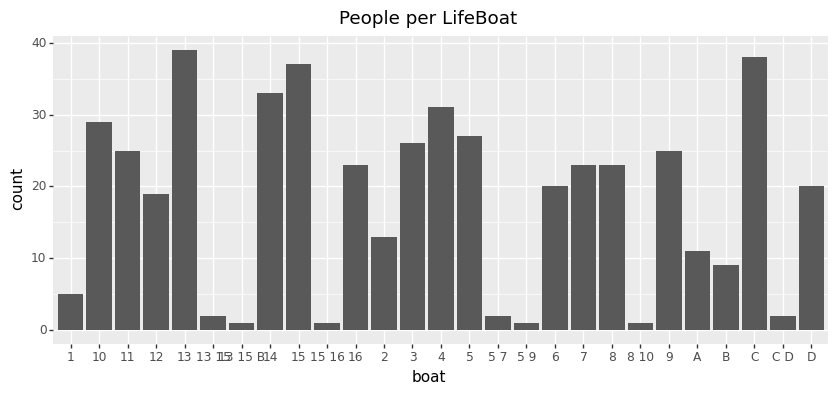

<ggplot: (8786477349720)>

In [130]:
tmp = df[pd.isna(df.boat)==False]
p = p9.ggplot(tmp) +\
            p9.geom_bar(p9.aes(x='boat')) +\
            p9.labs(title='People per LifeBoat') +\
            p9.theme(figure_size=(10,4))
p

You can learn which `stat` a `geom` uses by inspecting the default value for the stat argument. For example, `?geom_bar` shows that the default value for stat is “count”, which means that `geom_bar()` uses `stat_count()`. `stat_count()` is documented on the same page as `geom_bar()`, and if you scroll down you can find a section called “Computed variables”. 

Here, we reproduce the same graphic using the `stat` instead of `geom`.

TODO: [ref](https://jeroenjanssens.com/plotnine/)

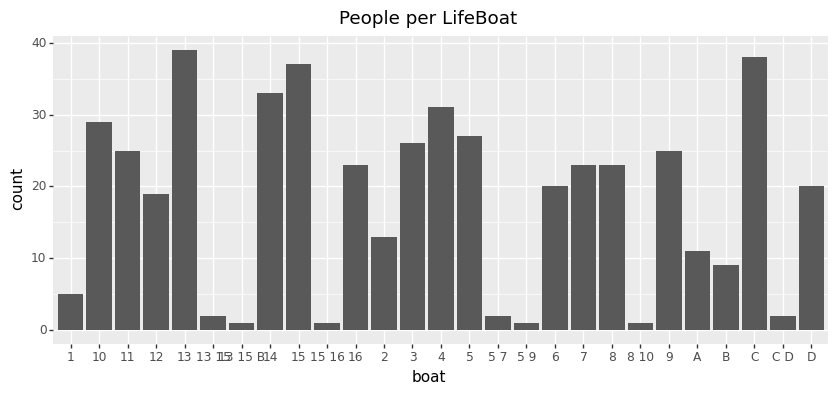

<ggplot: (8786476846333)>

In [156]:
tmp = df[pd.isna(df.boat)==False]
p = p9.ggplot(tmp) +\
            p9.stat_count(p9.aes(x='boat')) +\
            p9.labs(title='People per LifeBoat') +\
            p9.theme(figure_size=(10,4))
p

TODO: position, coordinate system, ...

### R Extensions

While the plotnine module is a strong python implementation of the ggplot2, the original R library has massive momentum behind it.  This led to hundreds of new libraries adding functionality to the ggplot2 code base.  We will explore a few of these, here. 

* [lists of extension libs](https://github.com/erikgahner/awesome-ggplot2)
* [gganimate](https://gganimate.com/)
* [ggridges](https://github.com/wilkelab/ggridges)

## Reports

There are multiple ways to create reports, including excel and html files, as well as dashboards.

### Excel output

Pandas (with XlsxWriter library) allows us to make an Excel sheet with graphs and other Excel functionality.  We need to define the type of the chart (line chart in our example) and the data series for the chart (the data series needs to be in the Excel spreadsheet).

In [ ]:
report_name = 'example_report.xlsx'
sheet_name = 'Sheet1'
writer = pd.ExcelWriter(report_name, engine='xlsxwriter')
df.to_excel(writer, sheet_name=sheet_name, index=False)
# writer.save()

# define the workbook
workbook = writer.book
worksheet = writer.sheets[sheet_name]
# create a chart line object
chart = workbook.add_chart({'type': 'line'})
# configure the series of the chart from the spreadsheet
# using a list of values instead of category/value formulas:
#     [sheetname, first_row, first_col, last_row, last_col]
chart.add_series({
    'categories': [sheet_name, 1, 0, 3, 0],
    'values':     [sheet_name, 1, 1, 3, 1],
})
# configure the chart axes
chart.set_x_axis({'name': 'Index', 'position_axis': 'on_tick'})
chart.set_y_axis({'name': 'Value', 'major_gridlines': {'visible': False}})
# place the chart on the worksheet
worksheet.insert_chart('E2', chart)
# output the excel file
writer.save()

### HTML report

### Dashboard with plotly